# General info
__Author__ = Reask <br>
__copyright__ = "Copyright 2024, Reask"

The script processes the sample trackset (120 years) and finds events at targets locations (latitude/longitude) defined by user user-defined <br>
Following are the items produced by this script: <br>
1. landfalling events at user-defined locations and intensity threshold
2. Exceedance probability of cyclone intensity



### User input


In [92]:
# Input track file
trackfile = 'North_Atlantic_Trackset_Sample_120years.csv'

# LOCATION 1: Miami [Name, Latitude, Longitude]
loc1 = ['Miami', 25.75, -80]

# LOCATION 2: New Orleans [Name, Latitude, Longitude]
loc2 = ['New Orleans', 30, -90]

# Search radius in miles
srad = 200

# Intensity (windspeed in m/s) threshold at Location 1 
# for loc 1
Vmax1 = 43 # Category 2 intensity
# for loc 1
Vmax2 = 33 # Category 1 intensity

### Step1: Load Python packges 

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib
import glob as glob


### Step 2: functions

In [94]:
# converting search radius from miles to kilometers
srad *= 1.60934


# function to calculate distance between track points and user-defined location
def calc_d(lat,lon, plat,plon):
    dist = 111* np.sqrt(((lat-plat)**2) + ((lon-plon)**2))
    return dist

# function to plot tracks
def plot_tracks(df, loc=None, title=None):

        fig, ax = plt.subplots(figsize=(12, 12),
                        subplot_kw=dict(projection=ccrs.PlateCarree()))

        extent = [-100, -67, 20, 45]

        ax.add_feature(cfeature.STATES, zorder=6000, linewidth=0.5, edgecolor='k')

        ax.set_extent(extent)
        ax.coastlines('10m', color="grey", linewidth=1, zorder=6000, alpha=1)
        ax.add_feature(cfeature.LAND.with_scale('10m'), facecolor='grey', zorder=100)

        if loc is not None:  
               ax.scatter(loc[2], loc[1], color = 'r', s=200, zorder=8000)

        for ii in df.SID.unique() :
                b = df.loc[df.SID==ii].reset_index(drop=True)
                ax.plot(b.LON,b.LAT,color='k',zorder=6000)

        if title is not None:
                ax.set_title(title, fontsize=25)



### Step 3: Read track file and calculate distance

In [95]:
# read input track csv file
trackset = pd.read_csv(trackfile)

# convert track longitude format form 0/360 to -180/180 
trackset["LON"] = (trackset["LON"] + 180) % 360 - 180

# calculate distance between track points and user location 1
trackset["dist1"] = trackset.apply(lambda row: calc_d( row.LON, row.LAT, loc1[2], loc1[1]), axis=1 )

# calculate distance between track points and user location 1
trackset["dist2"] = trackset.apply(lambda row: calc_d( row.LON, row.LAT, loc2[2], loc2[1]), axis=1 )

### Step 4: Filter events

In [96]:
# filter events for location 1 under 1) search radius and 2) intensity threshold
sids_loc1 = trackset.loc[(trackset.dist1 < srad) & (trackset.Vm > Vmax1)]['SID'].unique()
track_loc1 = trackset.loc[trackset.SID.isin(sids_loc1)]
print('No of events passing through ' + loc1[0] + ' is ' + str(sids_loc1.shape[0]))

# filter events for location 2 under 1) search radius and 2) intensity threshold
sids_loc2 = trackset.loc[(trackset.dist2 < srad) & (trackset.Vm > Vmax2)]['SID'].unique()
track_loc2 = trackset.loc[trackset.SID.isin(sids_loc2)]
print('No of events passing through ' + loc2[0] + ' is ' + str(sids_loc2.shape[0]))

# store storm IDs for events that passes through both locations
sids_conditional = track_loc1.loc[(track_loc1.dist2 < srad) & (track_loc1.Vm > Vmax2)]['SID'].unique()
track_conditional = track_loc1.loc[track_loc1.SID.isin(sids_conditional)]

print('No of events passing through ' + loc1[0] + ' and ' + loc2[0] + ' is ' + str(sids_conditional.shape[0]))


No of events passing through Miami is 64
No of events passing through New Orleans is 83
No of events passing through Miami and New Orleans is 9


### Step 5: Plot tracks

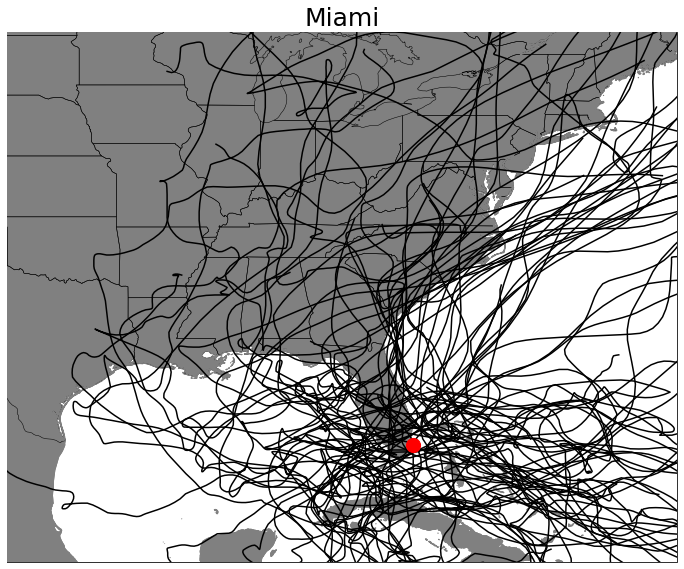

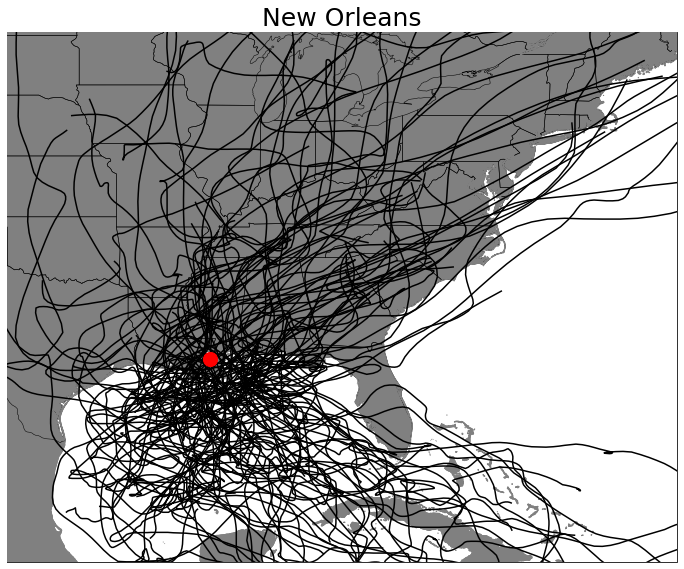

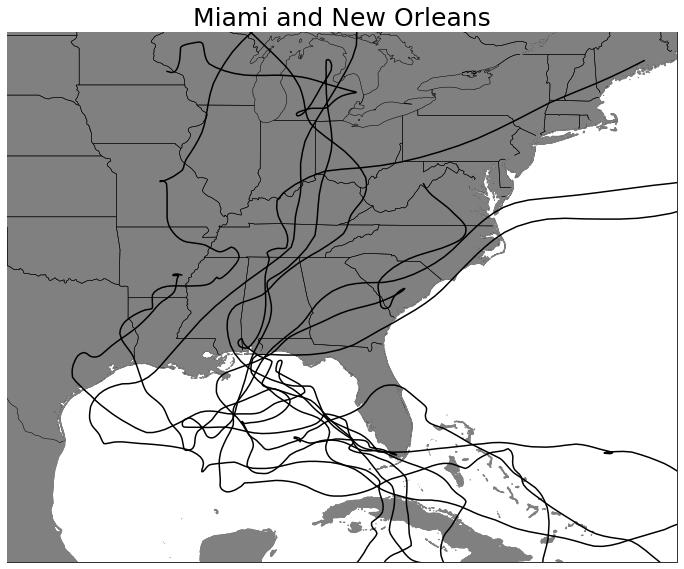

In [97]:
plot_tracks(track_loc1, loc1, 'Miami')
plot_tracks(track_loc2, loc2, 'New Orleans')
plot_tracks(track_conditional, None, 'Miami and New Orleans')

### Some basic STATS